# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mochammad Aurich Ilham Wicaksono
- **Email:** mochammadaurich@gmail.com
- **ID Dicoding:** aurich_ilham

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana pola penyewaan sepeda oleh pengguna *casual* dan *registerd* berubah sepanjang tahun?
- **Pertanyaan 2:** Bagaimana hubungan komposisi cuaca (temp, atemp, hum, windspeed) terhadap jumlah penyewaan sepeda?
- **Pertanyaan 3:** Apakah terdapat perbedaan pola penyewaan sepeda untuk masing-masing hari?

## Import Semua Packages/Library yang Digunakan

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [35]:
# Read csv file
day_df = pd.read_csv('/content/drive/MyDrive/Submission/Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
hour_df = pd.read_csv('/content/drive/MyDrive/Submission/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data yang ada pada Day Data dan Daily Data memiliki *feature* yang hampir sama. Day Data memiliki 15 *feature*, sedangkan Daily Data memiliki 16 *feature* (adanya tambahan *feature* "hr" yang merepresentasikan jam dalam sehari).
- Terdapat *feature* yang datanya merupakan hasil normalisasi dengan range 0 hingga 1, yaitu *feature* "temp", "atemp", "hum", dan "windspeed".
- Data pada *feature* "cnt" merupakan hasil penjumlahan dari *feature* "casual" dan "registered".

### Assessing Data

In [37]:
# Informasi Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [38]:
# Cek apakah ada data yang duplikat
print("Jumlah duplikat pada Day Data: ", day_df.duplicated().sum())

Jumlah duplikat pada Day Data:  0


In [39]:
# Mendeskripsikan data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [40]:
# Informasi Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [41]:
# Cek apakah ada data yang duplikat
print("Jumlah duplikat pada Day Data: ", hour_df.duplicated().sum())

Jumlah duplikat pada Day Data:  0


In [42]:
# Mendeskripsikan data
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data, baik pada **Day Data** maupun **Hour Data**, yaitu pada feature "dteday". Saat ini bertipe *object*, yang berarti diinterpretasikan sebagai string. Karena kolom ini berisi tanggal, tipe data yang lebih tepat adalah *datetime*.
- Pada **Day Data** dan **Hour Data** tidak memiliki *missing value* dan duplikasi data.

### Cleaning Data

In [43]:
# Mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data pada "dteday" sudah menjadi *datetime*.
- Setelah dilakukan Cleaning Data, dataset sudah siap untuk dilakukan Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [44]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


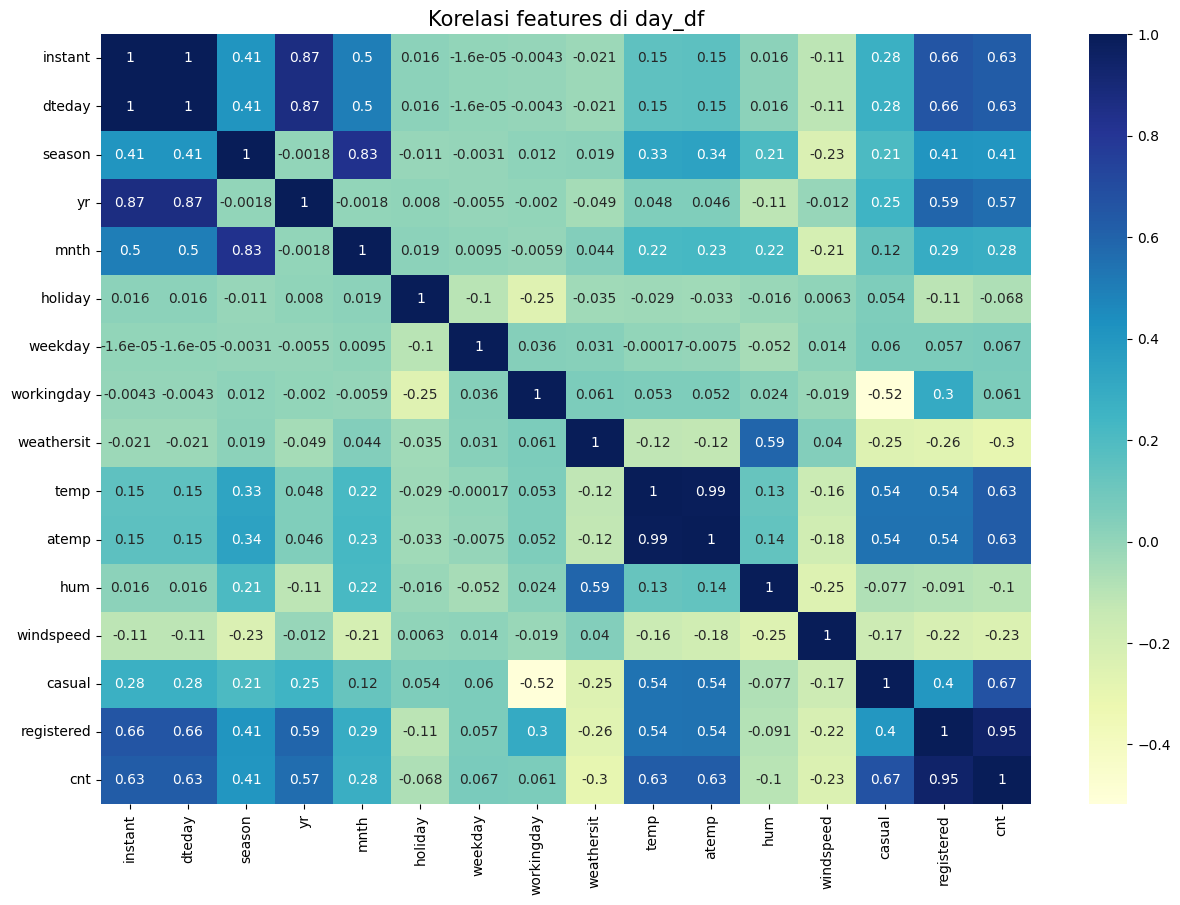

In [45]:
# Melihat korelasi feature di day_df dengan visualisasi
plt.figure(figsize=(15, 10))
sns.heatmap(day_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Korelasi features di day_df", size=15)
plt.show()

In [46]:
day_df.groupby(by='yr').agg({
    'casual': ['mean','max', 'min'],
    'registered': ['mean','max', 'min'],
})

casual             registered           
           mean   max min         mean   max  min
yr                                               
0    677.402740  3065   9  2728.358904  4614  416
1   1018.483607  3410   2  4581.450820  6946   20

In [47]:
# Mengetahui rata-rata penyewa sepeda (cnt) untuk setiap season
cnt_in_season_df = day_df.groupby('season')['cnt'].mean()
cnt_in_season_df

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


In [48]:
# Mengetahui rata-rata temp, atemp, hum, windspeed setiap bulannya
temp_in_month_df = day_df.groupby('mnth')[['season','temp', 'atemp', 'hum', 'windspeed']].mean()
temp_in_month_df

,season,temp,atemp,hum,windspeed
mnth,,,,,
1,1.000000,0.236444,0.239796,0.585828,0.206303
2,1.000000,0.299226,0.299731,0.567465,0.215684
3,1.354839,0.390539,0.381954,0.588475,0.222699
4,2.000000,0.469999,0.457081,0.588063,0.234482
5,2.000000,0.594798,0.565662,0.688958,0.182989
6,2.333333,0.684097,0.638246,0.575806,0.185420
7,3.000000,0.755470,0.704094,0.597876,0.166059
8,3.000000,0.708582,0.651475,0.637730,0.172918
9,3.266667,0.616485,0.579299,0.714714,0.165945


### Explore Data hour_df

In [49]:
# Mengetahui rata-rata penyewa sepeda (cnt) untuk setiap jam
cnt_in_hour_df = hour_df.groupby('hr')['cnt'].mean()
cnt_in_hour_df

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


**Insight:**
- Berdasarkan perhitungan score korelasi yang dilakukan pada tahp ini, didapatkan informasi bahwa feature 'temp' dan 'attemp' mempunyai pengaruh yang cukup besar ke penyewaan sepeda 'cnt'.
- Terdapat metode Groupby yang membantu analisis.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

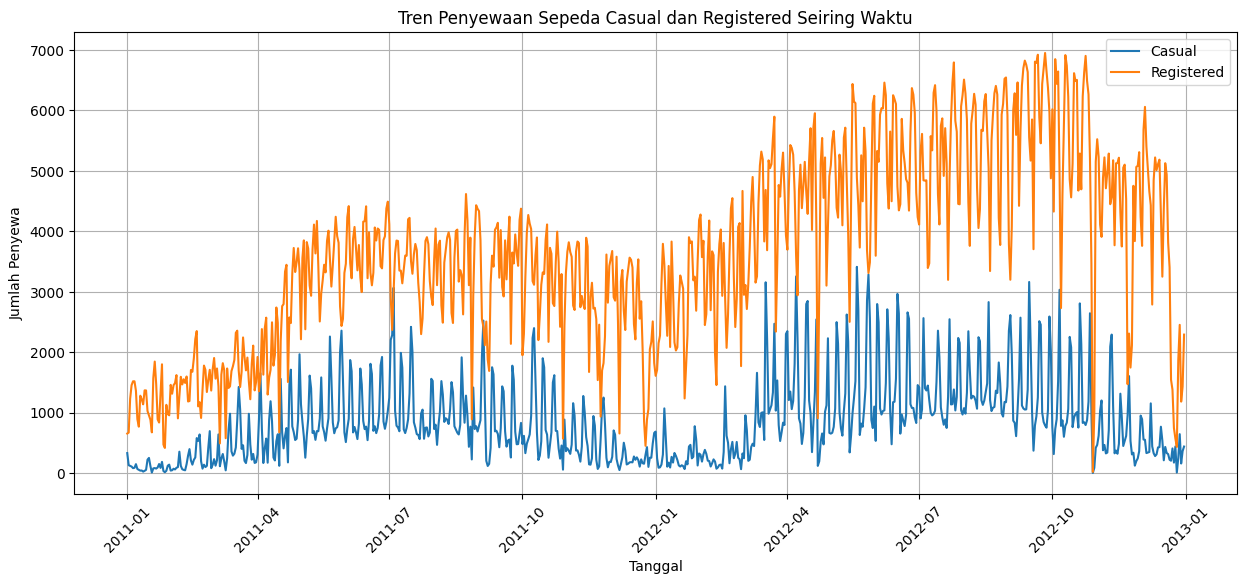

In [50]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='casual', data=day_df, label='Casual')
sns.lineplot(x='dteday', y='registered', data=day_df, label='Registered')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewa')
plt.title('Tren Penyewaan Sepeda Casual dan Registered Seiring Waktu')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Pertanyaan 2:

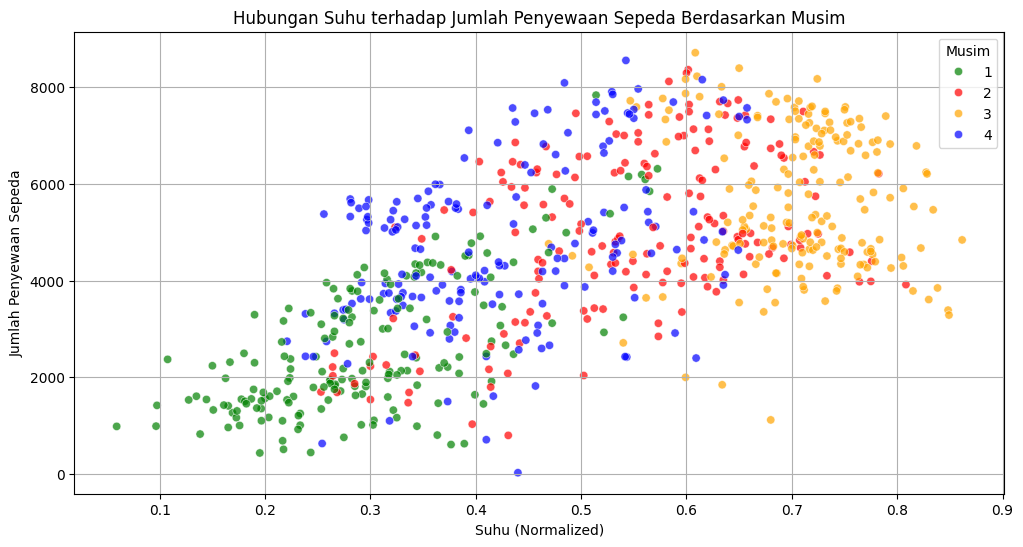

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', hue='season', data=day_df, palette=['green', 'red', 'orange', 'blue'], alpha=0.7)

# Menambahkan judul dan label
plt.title('Hubungan Suhu terhadap Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan Sepeda')

# Menampilkan plot
plt.legend(title='Musim', loc='upper right')
plt.grid(True)
plt.show()

<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)


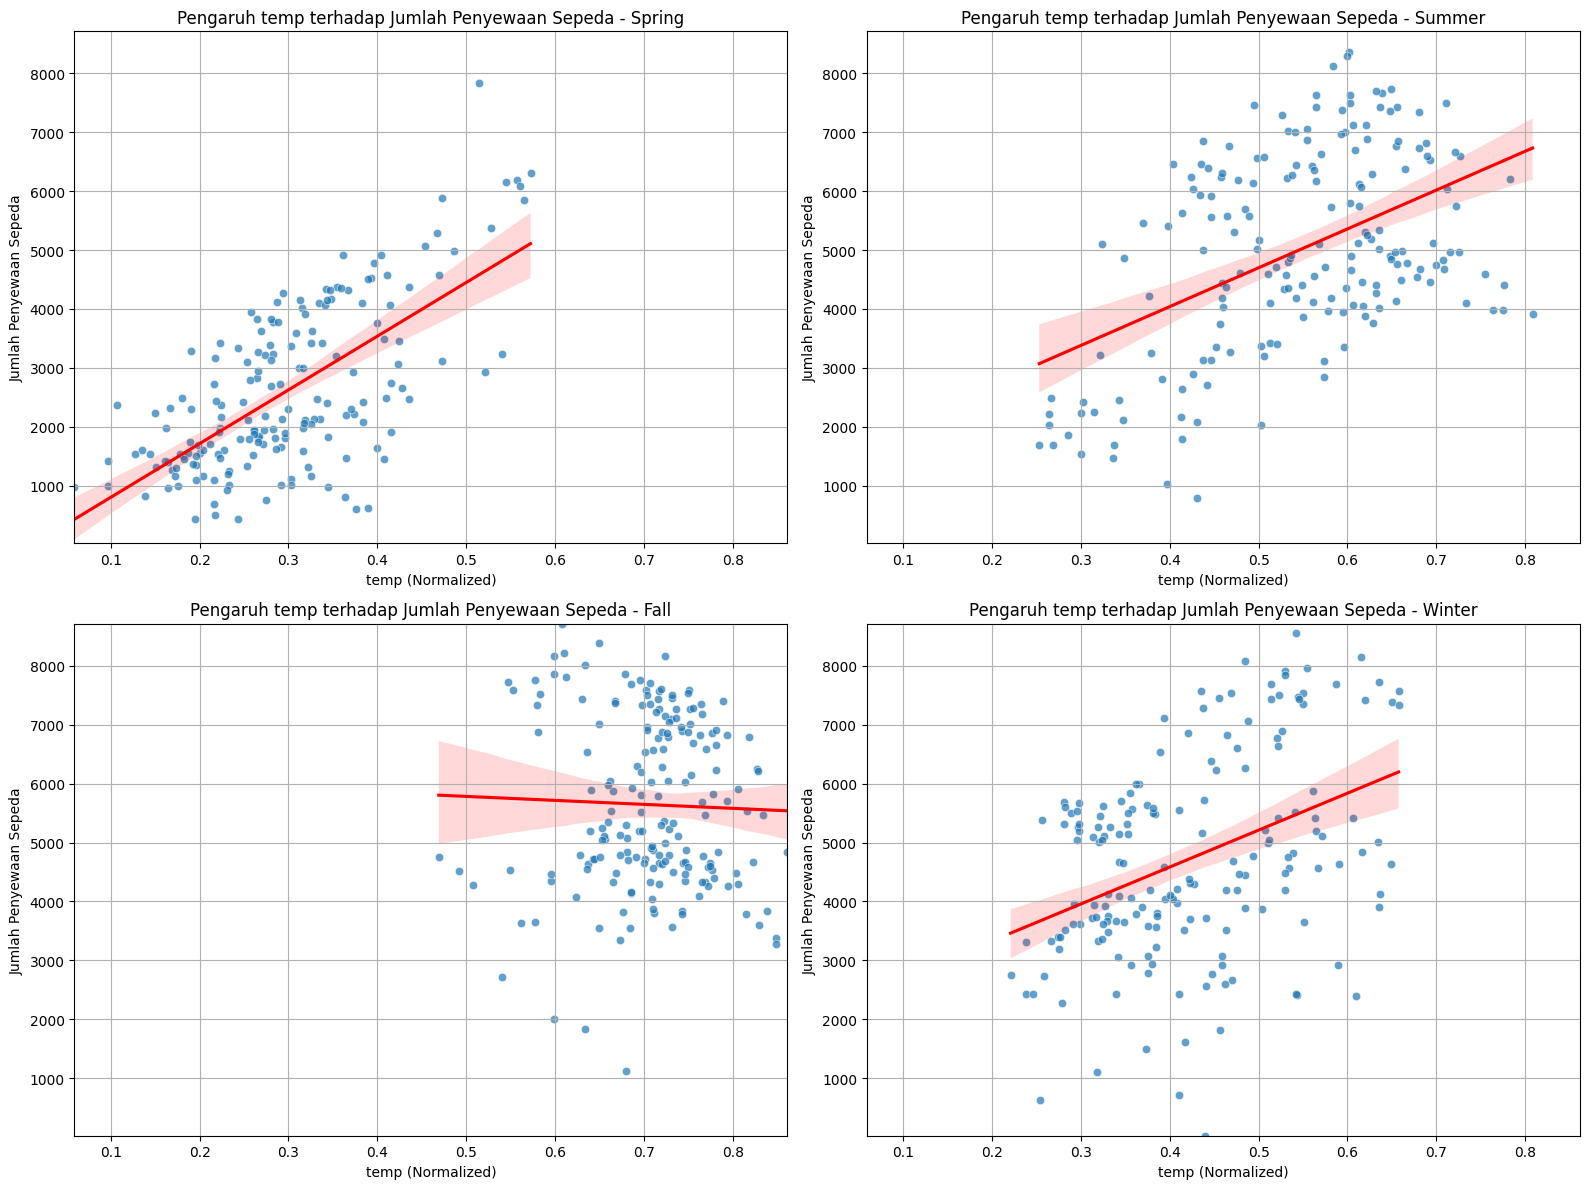

<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)


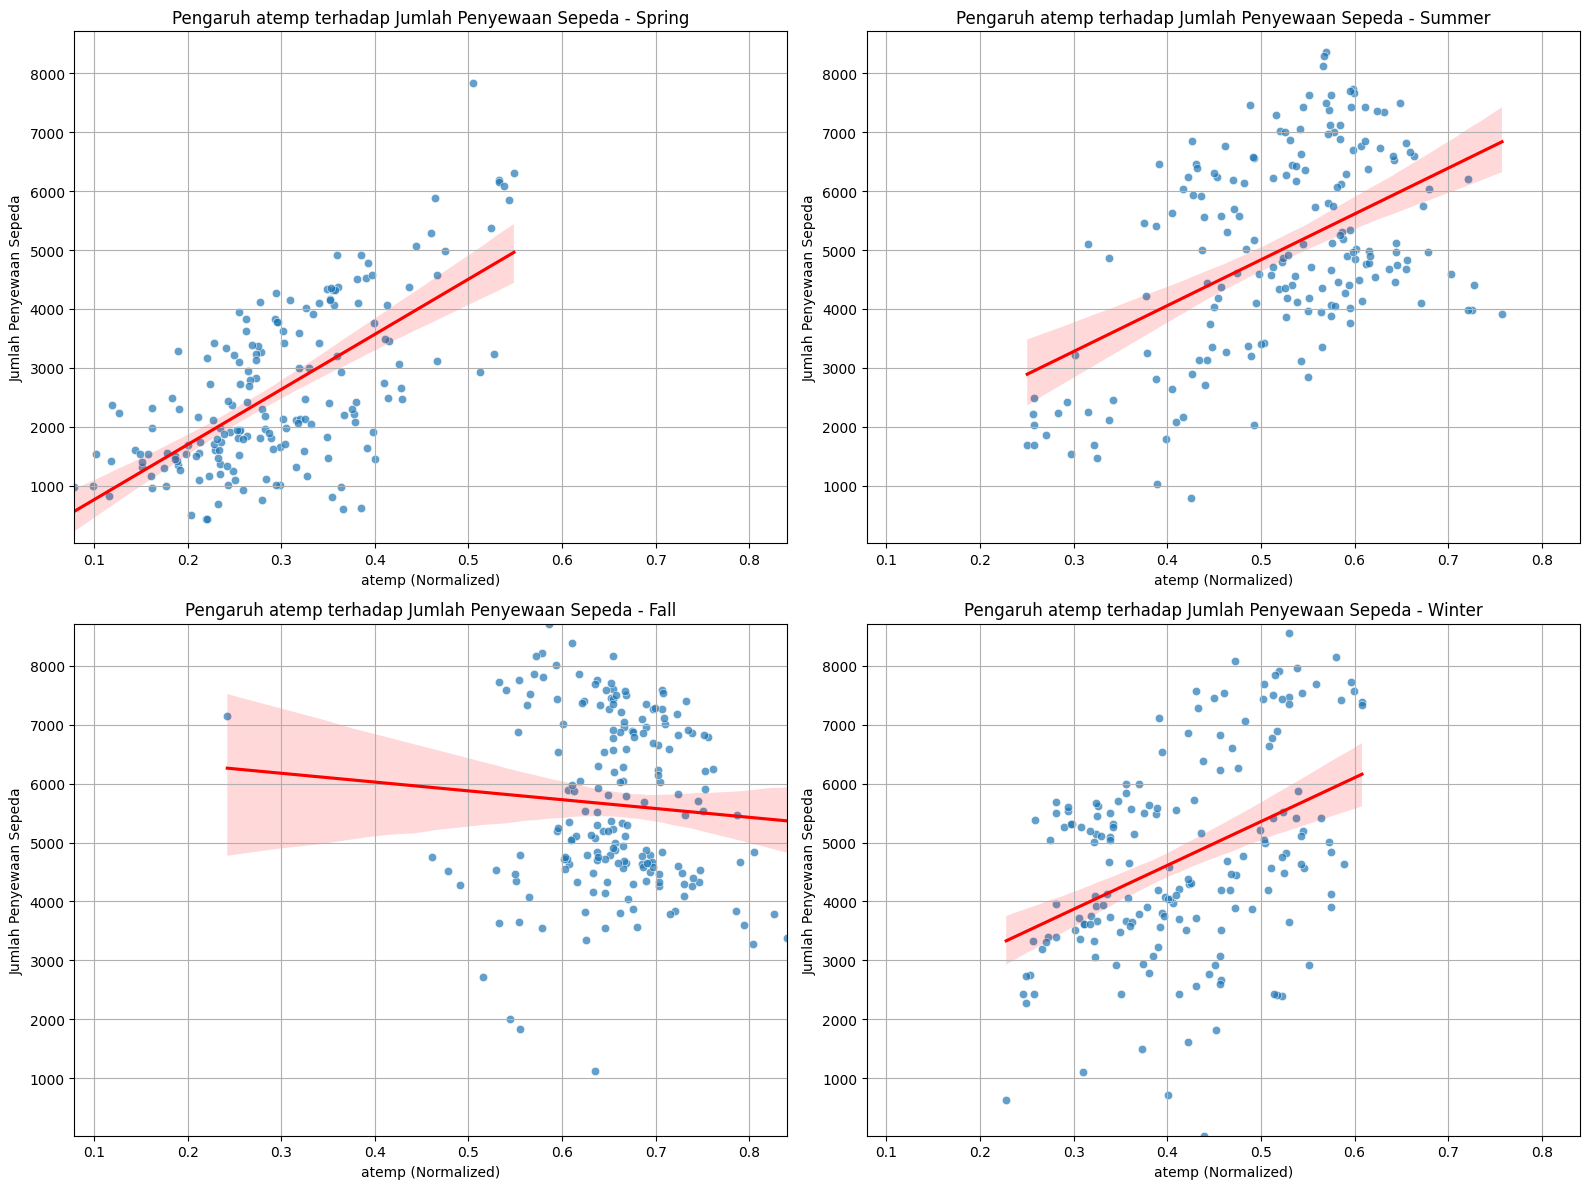

<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)


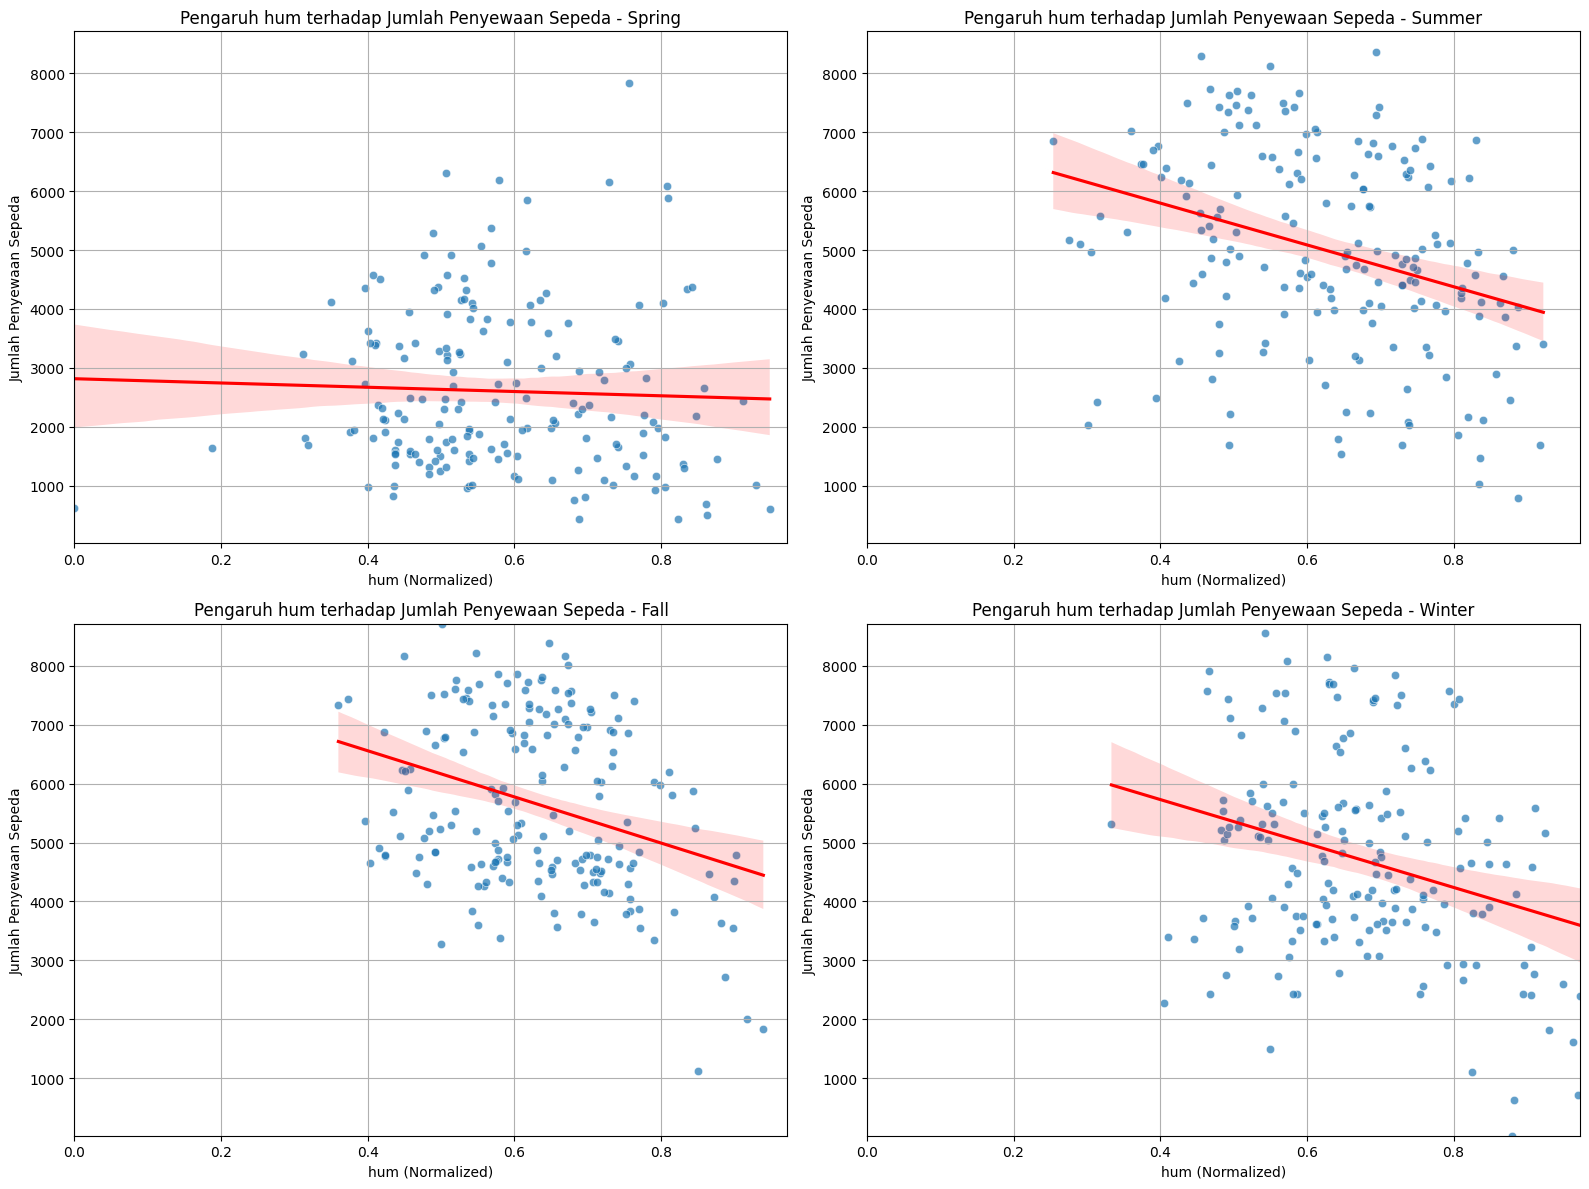

<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)
<ipython-input-52-1bf7ba1e0dd1>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)


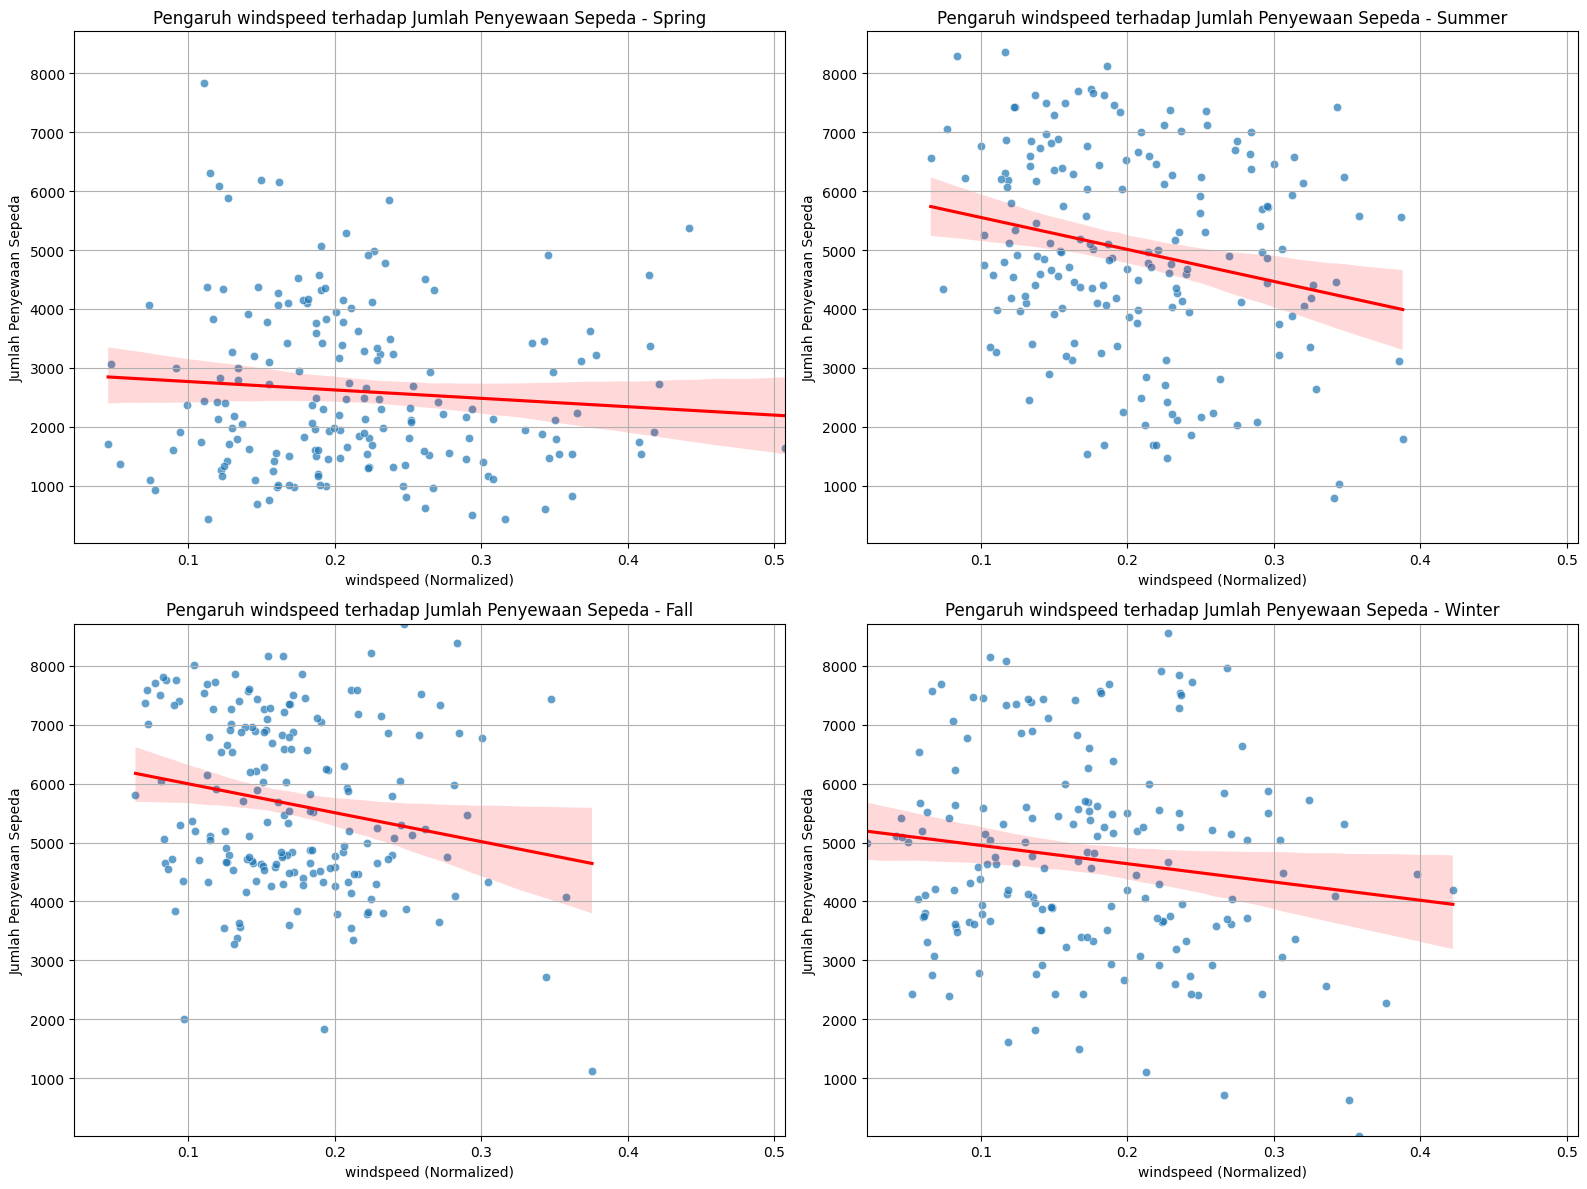

In [52]:
# Menentukan musim
seasons = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Mengatur jumlah subplots
num_seasons = len(seasons)

weather_types = ['temp', 'atemp', 'hum', 'windspeed']

# Mengatur ukuran figure

for weather_type in weather_types:
    plt.figure(figsize=(16, 12))

    for i, (season, title) in enumerate(seasons.items()):
        plt.subplot(2, 2, i + 1)  # 2x2 subplots
        # Filter data berdasarkan musim
        season_data = day_df[day_df['season'] == season]

        # Membuat scatter plot
        sns.scatterplot(x=weather_type , y='cnt', data=season_data, palette='viridis', alpha=0.7)

        # Menambahkan garis regresi
        sns.regplot(x=weather_type, y='cnt', data=season_data, scatter=False, color='red', line_kws={'label': 'Garis Regresi'})

        # Menambahkan judul dan label
        plt.title(f'Pengaruh {weather_type} terhadap Jumlah Penyewaan Sepeda - {title}')
        plt.xlabel(f'{weather_type} (Normalized)')
        plt.ylabel('Jumlah Penyewaan Sepeda')

        # Menetapkan batas sumbu yang sama
        plt.xlim(day_df[weather_type].min(), day_df[weather_type].max())
        plt.ylim(day_df['cnt'].min(), day_df['cnt'].max())
        plt.grid(True)

    # Menyesuaikan layout
    plt.tight_layout()
    plt.show()


### Pertanyaan 3:

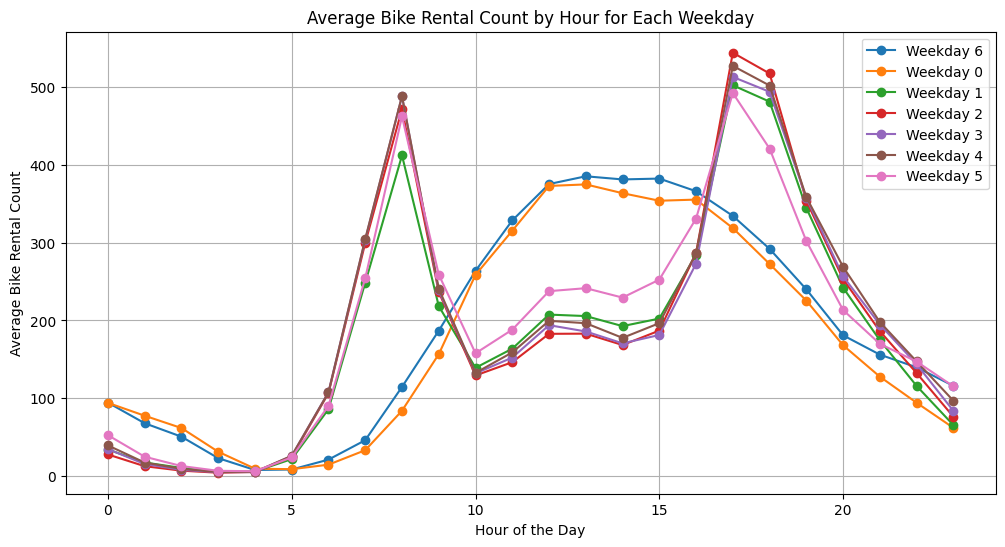

In [53]:
plt.figure(figsize=(12, 6))

for weekday in hour_df['weekday'].unique():
  cnt_in_hour_weekday = hour_df[hour_df['weekday'] == weekday].groupby('hr')['cnt'].mean()
  plt.plot(cnt_in_hour_weekday.index, cnt_in_hour_weekday.values, label=f"Weekday {weekday}", marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rental Count')
plt.title('Average Bike Rental Count by Hour for Each Weekday')
plt.legend()
plt.grid(True)
plt.show()


**Insight:**
- Berdasarkan hasil visualisasi

In [54]:
# export day_df dan hour_df
# day_df.to_csv('day_df.csv', index=False)
# hour_df.to_csv('hour_df.csv', index=False)
# day_df.info()

## Analisis Lanjutan (Opsional)

Pada bagian ini, analisis lanjutan dilakukan dengan Manual Grouping. Berdasarkan hasil visualisasi data untuk pertanyaan 3, terdapat perbedaan pattern pada hari weekend dan weekday. Pada kasus ini, data akan dikelompokkan berdasarkan rush hour. Berikut detail pengelompokkan:

1.   Weekday
    - Rush Hour: 07:00 - 09:00 & 16:00 - 18:00  
2.   Weekend
    - Rush Hour: 10:00 - 18:00

In [55]:
def rush_hour(row):
    if row['weekday'] < 6 and row['weekday'] > 0:  # Hari kerja (Senin-Jumat)
        if (7 <= row['hr'] <= 9) or (16 <= row['hr'] <= 18):
            return 'Weekday Rush Hour'
        else:
            return 'Weekday Non-Rush Hour'
    else:  # Akhir pekan (Sabtu-Minggu)
        if (10 <= row['hr'] <= 18):  # Contoh jam sibuk akhir pekan
            return 'Weekend Rush Hour'
        else:
            return 'Weekend Non-Rush Hour'

new_hour_df = hour_df.copy()

# Menambahkan kolom baru 'rush_hour_group' berdasarkan fungsi di atas
new_hour_df['rush_hour_group'] = new_hour_df.apply(rush_hour, axis=1)

# Menampilkan beberapa baris data untuk melihat hasil
print(new_hour_df[['hr', 'weekday', 'rush_hour_group']].sample(10))

       hr  weekday        rush_hour_group
14715   8        1      Weekday Rush Hour
12276  17        4      Weekday Rush Hour
10742  17        3      Weekday Rush Hour
15076   9        2      Weekday Rush Hour
10987  23        6  Weekend Non-Rush Hour
6048   14        3  Weekday Non-Rush Hour
5619    1        6  Weekend Non-Rush Hour
3413    3        5  Weekday Non-Rush Hour
6568    6        4  Weekday Non-Rush Hour
15865   6        0  Weekend Non-Rush Hour


In [56]:
new_hour_df.groupby(by='rush_hour_group').agg({
    'casual': ['sum','mean','max', 'min'],
    'registered': ['sum','mean','max', 'min'],
    'cnt': ['sum','mean','max', 'min'],
})

casual                      registered              \
                          sum        mean  max min        sum        mean   
rush_hour_group                                                             
Weekday Non-Rush Hour  212585   22.969746  272   0     977792  105.650135   
Weekday Rush Hour      113059   36.353376  264   0    1067409  343.218328   
Weekend Non-Rush Hour   68460   21.907200  230   0     213621   68.358720   
Weekend Rush Hour      225913  119.593965  367   0     413840  219.078878   

                                    cnt                       
                       max min      sum        mean  max min  
rush_hour_group                                               
Weekday Non-Rush Hour  662   0  1190377  128.619881  743   1  
Weekday Rush Hour      886   6  1180468  379.571704  977   6  
Weekend Non-Rush Hour  369   0   282081   90.265920  554   1  
Weekend Rush Hour      526   4   639753  338.672843  783   7

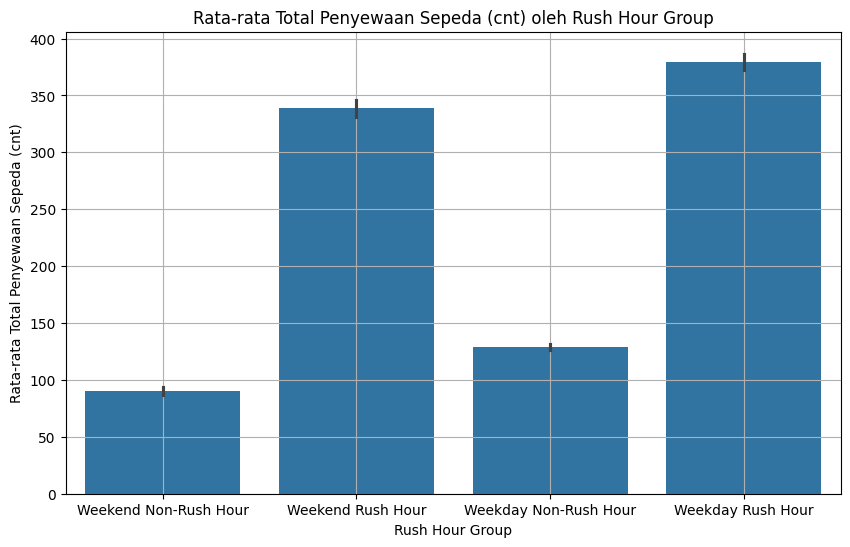

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rush_hour_group', y='cnt', data=new_hour_df)
plt.xlabel('Rush Hour Group')
plt.ylabel('Rata-rata Total Penyewaan Sepeda (cnt)')
plt.title('Rata-rata Total Penyewaan Sepeda (cnt) oleh Rush Hour Group')
plt.grid(True)
plt.show()


In [58]:
# export new_hour_df
# new_hour_df.to_csv('new_hour_df.csv', index=False)

## Conclusion


- **Conclusion 1:** Berdasarkan pola yang dihasilkan, terlihat bahwa jumlah user, baik 'casual' maupun 'registered', mengalami peningkatan ketika di bulan Mei dan mengalami penurunan ketika mulai memasuki bulan November. Dari grafik dapat dijelaskan juga bahwa user 'casual' lebih sedikit dibandingkan dengan user 'registered'.

- **Conclusion 2:** Dari hasil visualisasi data pada pertanyaan kedua, terdapat hubungan antara komponen cuaca dengan total penyewaan sepeda pada masing-masing 'season'. Berdasarkan grafik garis regresi, terdapat beberapa yang memiliki kemiringang yang tinggi. Misalnya pada 'temp' mempunyai hubungan yang tinggi dengan total penyewaan 'cnt' pada season "Spring", "Summer", dan "Winter". Begitu pula dengan 'atemp'. Semakin naiknya suhu maka akan semakin naiknya pula total penyewaan.

- **Conclusion 3:** Terdapat perbedaan yang sangat jelas untuk pola penyewaan sepeda dengan hari-hari tertentu. Terlihat bahwa hari Sabtu dan Minggu memiliki pola yang sama, sedangkan sisa hari yang lain memiliki pola yang hampir sama.